In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
HOME = os.getcwd()
TrainDataset = "/content/drive/MyDrive/cifar-3class-data/train"
TestDataset = "/content/drive/MyDrive/cifar-3class-data/train"

In [ ]:
%cd {TrainDataset}/0
trainingset0  = []
trainingset0 = os.listdir()
%cd {TrainDataset}/1
trainingset1 = []
trainingset1 = os.listdir()
%cd {TrainDataset}/2
trainingset2 = []
trainingset2 = os.listdir()

/content/drive/MyDrive/cifar-3class-data/train/0
/content/drive/MyDrive/cifar-3class-data/train/1
/content/drive/MyDrive/cifar-3class-data/train/2


In [ ]:
print(len(trainingset0 + trainingset1 + trainingset2))

1550


In [ ]:
for i in range(len(trainingset0)):
  trainingset0[i] = '0/' + trainingset0[i]
print(trainingset0)

for i in range(len(trainingset1)):
  trainingset1[i] = '1/' + trainingset1[i]
print(trainingset1)

for i in range(len(trainingset2)):
  trainingset2[i] = '2/' + trainingset2[i]
print(trainingset2)

['0/223.png', '0/116 (1).png', '0/93.png', '0/293.png', '0/284.png', '0/279.png', '0/276.png', '0/220.png', '0/185.png', '0/30 (1).png', '0/116.png', '0/129 (1).png', '0/213.png', '0/30.png', '0/165.png', '0/233.png', '0/115 (1).png', '0/189.png', '0/115.png', '0/264.png', '0/199.png', '0/179.png', '0/29.png', '0/49.png', '0/77.png', '0/35.png', '0/129.png', '0/626.png', '0/637.png', '0/401.png', '0/376.png', '0/467.png', '0/436.png', '0/448.png', '0/453.png', '0/405.png', '0/497.png', '0/455.png', '0/614.png', '0/344.png', '0/404.png', '0/600.png', '0/371.png', '0/308.png', '0/415.png', '0/349.png', '0/663.png', '0/557.png', '0/605.png', '0/332.png', '0/481.png', '0/628.png', '0/348.png', '0/439.png', '0/504.png', '0/392.png', '0/650.png', '0/564.png', '0/598.png', '0/604.png', '0/373.png', '0/555.png', '0/608.png', '0/317.png', '0/352.png', '0/407.png', '0/658.png', '0/527.png', '0/417.png', '0/341.png', '0/468.png', '0/457.png', '0/1166 (1).png', '0/871.png', '0/1147 (1).png', '0/73

In [ ]:
trainingset = trainingset0 + trainingset1 + trainingset2


In [ ]:
y = [0]*len(trainingset0) + [1]*len(trainingset1) + [2]*len(trainingset2)

In [ ]:
Xtrain , validationset1 , ytrain , yvalidation = train_test_split(trainingset,y, test_size = 0.1, random_state= 42, shuffle = True)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
def creatingSet(list):
  list2 = []
  for i in range(len(list)):
    img = plt.imread(list[i])
    list2.append(img)
  return list2

In [ ]:
from re import X
%cd {TrainDataset}
Xtrain = creatingSet(Xtrain)
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)

y_onenot = to_categorical(ytrain)


Xvalidation = creatingSet(validationset1)
Xvalidation = np.array(Xvalidation)
yvalidation = np.array(yvalidation)
y_val_onenot = to_categorical(yvalidation)

/content/drive/MyDrive/cifar-3class-data/train


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3) ,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3) ,activation='relu'))
model.add(Conv2D(128, (3,3) ,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(Xtrain)
print(y_onenot)
print(Xvalidation)
print(y_val_onenot)

[[[[0.25490198 0.2901961  0.2509804 ]
   [0.27450982 0.30588236 0.26666668]
   [0.27450982 0.30588236 0.26666668]
   ...
   [0.29411766 0.3254902  0.3137255 ]
   [0.29803923 0.32941177 0.3137255 ]
   [0.30588236 0.3372549  0.3254902 ]]

  [[0.2509804  0.2784314  0.25490198]
   [0.26666668 0.29411766 0.26666668]
   [0.26666668 0.29803923 0.27058825]
   ...
   [0.2509804  0.29803923 0.2901961 ]
   [0.2509804  0.29803923 0.2901961 ]
   [0.25882354 0.30588236 0.29803923]]

  [[0.24313726 0.2901961  0.27450982]
   [0.25490198 0.3019608  0.28627452]
   [0.2627451  0.30980393 0.29411766]
   ...
   [0.23529412 0.29803923 0.29411766]
   [0.23529412 0.29803923 0.29411766]
   [0.23921569 0.29803923 0.29411766]]

  ...

  [[0.25490198 0.5137255  0.5372549 ]
   [0.23137255 0.4745098  0.49019608]
   [0.2509804  0.4862745  0.5019608 ]
   ...
   [0.20784314 0.49019608 0.5254902 ]
   [0.22745098 0.49411765 0.5372549 ]
   [0.27450982 0.52156866 0.5803922 ]]

  [[0.23921569 0.49019608 0.50980395]
   [0.2

In [ ]:
history = model.fit(Xtrain, y_onenot, epochs=500, batch_size=200, validation_data=(Xvalidation, y_val_onenot))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 875ms/step - accuracy: 0.3416 - loss: 1.0886 - val_accuracy: 0.4516 - val_loss: 1.0202
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4794 - loss: 1.0142 - val_accuracy: 0.6065 - val_loss: 0.8886
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5645 - loss: 0.9110 - val_accuracy: 0.5613 - val_loss: 0.9159
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6523 - loss: 0.8188 - val_accuracy: 0.6839 - val_loss: 0.7713
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7371 - loss: 0.6533 - val_accuracy: 0.7097 - val_loss: 0.7377
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7507 - loss: 0.5981 - val_accuracy: 0.7355 - val_loss: 0.6655
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7681 - loss: 0.5603 - val_accuracy: 0.7097 - val_loss: 0.6597
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7718 - loss: 0.5528 - val_accuracy: 0.6968 - val_los

In [ ]:
%cd /content/drive/MyDrive/cifar-3class-data
model.save('model.h5')

/content/drive/MyDrive/cifar-3class-data


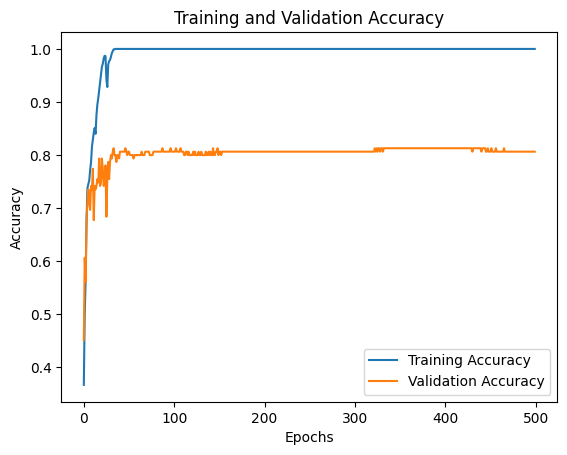

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
%cd {TestDataset}/0
testset0  = []
testset0 = os.listdir()
%cd {TestDataset}/1
testset1 = []
testset1 = os.listdir()
%cd {TestDataset}/2
testset2 = []
testset2 = os.listdir()

/content/drive/MyDrive/cifar-3class-data/train/0
/content/drive/MyDrive/cifar-3class-data/train/1
/content/drive/MyDrive/cifar-3class-data/train/2


In [ ]:


%cd {TestDataset}
for i in range(len(testset0)):
  testset0[i] = '0/' + testset0[i]

for i in range(len(testset1)):
  testset1[i] = '1/' + testset1[i]

for i in range(len(testset2)):
  testset2[i] = '2/' + testset2[i]




/content/drive/MyDrive/cifar-3class-data/train


In [ ]:
testset = testset0 + testset1 + testset2
ytest = [0]*len(testset0) + [1]*len(testset1) + [2]*len(testset2)


In [ ]:
%cd {TestDataset}

Xtest = creatingSet(testset)



/content/drive/MyDrive/cifar-3class-data/train


In [ ]:
Xtest = np.array(Xtest)
ytest = np.array(ytest)
ytest_categorical = to_categorical(ytest)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(Xtest, ytest_categorical)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc * 100, '%')

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9729 - loss: 0.3434
Test loss: 0.21405912935733795
Test accuracy: 98.06451797485352 %


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


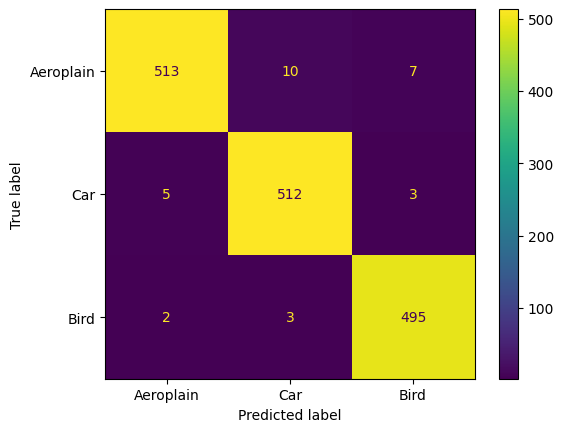

Test Accuracy: 98.06451612903226 %


In [89]:

Xtest = Xtest.astype('float32') # Normalize pixel values to [0, 1]
model = load_model('/content/drive/MyDrive/cifar-3class-data/model.h5')
y_pred_prob = model.predict(Xtest)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aeroplain', 'Car', 'Bird'])
disp.plot()
plt.show()
test_acc = np.sum(y_pred == ytest) / len(ytest) * 100
print("Test Accuracy:", test_acc, '%')